In [1]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import entropy as cluster_entropy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sizes3 = pd.read_csv("sizes3 (with class label).csv")
sizes3

,x,y,class
0,9.285310,14.587900,0
1,12.397700,8.448900,0
2,8.736240,11.680300,0
3,9.101970,12.832700,0
4,12.294800,8.673730,0
...,...,...,...
995,0.951624,1.631500,3
996,1.421170,-0.673289,3
997,1.475480,-2.454380,3
998,-0.633825,0.591556,3


In [3]:
sizes3.apply(lambda x:np.sum(x==' '))

x        0
y        0
class    0
dtype: int64

In [4]:
X = sizes3.drop(labels=['class'],axis=1)
sizes3_class = sizes3['class'].values
X

,x,y
0,9.285310,14.587900
1,12.397700,8.448900
2,8.736240,11.680300
3,9.101970,12.832700
4,12.294800,8.673730
...,...,...
995,0.951624,1.631500
996,1.421170,-0.673289
997,1.475480,-2.454380
998,-0.633825,0.591556


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
x_scaled = scaler.transform(X)
X = pd.DataFrame(x_scaled,columns=X.columns)
X

,x,y
0,0.691773,0.908751
1,0.835630,0.638735
2,0.666394,0.780864
3,0.683299,0.831551
4,0.830874,0.648624
...,...,...
995,0.306583,0.338880
996,0.328286,0.237506
997,0.330796,0.159167
998,0.233303,0.293139


In [14]:
Start = time.time()

kmeans = KMeans(n_clusters=4,random_state=42).fit(X)
y_pred = kmeans.fit_predict(X)
print("分群結果: ")
print(y_pred)

End = time.time()
print("運行時間: ",End-Start)

分群結果: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0

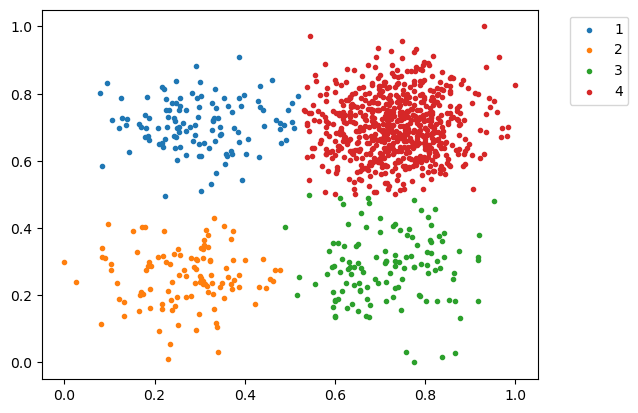

In [7]:
X['cluster'] = y_pred
plt.scatter(X[X['cluster'] == 0]['x'], X[X['cluster'] == 0]['y'], marker='.', label='1')
plt.scatter(X[X['cluster'] == 1]['x'], X[X['cluster'] == 1]['y'], marker='.', label='2')
plt.scatter(X[X['cluster'] == 2]['x'], X[X['cluster'] == 2]['y'], marker='.', label='3')
plt.scatter(X[X['cluster'] == 3]['x'], X[X['cluster'] == 3]['y'], marker='.', label='4')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.show()

In [8]:
cluster_centers = np.array([X[y_pred == i].mean(axis=0) for i in range(4)])

distances_squared = np.sum((X - cluster_centers[y_pred]) ** 2, axis=1)

sse = np.sum(distances_squared)

print('SSE =',sse)

SSE = 16.97727017213937


In [9]:
entropy = cluster_entropy(y_pred)

print('Entropy =',entropy)

Entropy = 1.033228155287126


In [10]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(sizes3_class, y_pred)

print('Adjusted Rand Index (ARI) =', ari)

Adjusted Rand Index (ARI) = 0.9429003438657473


In [15]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
y_pred = kmeans.labels_

cluster_names = {0:0 ,2: 1,3:2,1:3}

y_pred_named = [cluster_names[label] for label in y_pred]

print(y_pred_named)
acc = accuracy_score(sizes3_class, y_pred_named)

print('Accuracy =',acc)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 